In [1]:
#Author: Abhishek N. Singh
#Description: This script evaluates the AUC value for a drug when acting against cell viability such 
#as cancer cells, and then I try to fit a regression model for Ccle data
#Date: 26th December 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
import seaborn as sns





In [2]:
dataset = pd.read_csv("ccle_Erlotinib_auc.csv", delimiter=",")

In [3]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,exp_ALDH3B1,exp_TBXA2R,exp_ELAC2,exp_PIGQ,exp_MYLIP,exp_PSMB1,exp_ABHD5,exp_BRCA1,exp_POLR3B,exp_GRAMD1B,exp_DEF6,exp_AGPAT4,exp_GAB2,exp_YTHDC2,exp_C12orf4,exp_TNIP3,exp_THRAP3,exp_STYK1,exp_ERBB3,exp_CDK13,exp_MGAT4A,exp_FCGR2B,exp_XRCC1,exp_TP63,exp_ALPK1,exp_GLI2,exp_PLD1,exp_GPATCH1,exp_P2RY10,exp_PGM1,exp_SCTR,exp_GSK3B,exp_TNPO1,exp_SLC27A5,exp_KIF3C,exp_RRN3,exp_WNT11,exp_MTIF2,...,exp_CACTIN,exp_MYCNOS,exp_TONSL,exp_TMEM17,exp_LCN2,exp_CARD11,exp_DFFB,exp_C1orf64,exp_NTRK1,exp_C16orf52,exp_DTX3,exp_NRDE2,exp_FPGS,exp_CSNK1G2,exp_PRKD1,exp_IMMP2L,exp_CDK14,exp_CCL25,exp_TPM3,exp_PAPD5,exp_CCNK,exp_SMPDL3B,exp_ZNF479,exp_ABRACL,exp_CCDC157,exp_FBXO5,exp_AC006116.17,exp_EPS8L1,exp_TAAR1,exp_RP1-69D17.3,exp_ZFY,exp_RPS29,exp_SMAD5,exp_ZC3HC1,exp_ZMYM3,exp_CIRBP,exp_MSN,exp_PDPN,exp_KIAA1456,Erlotinib
0,0,22RV1,5.332068,5.613804,8.583122,5.351879,7.298835,12.727437,7.815232,9.582944,9.377173,5.045035,6.078029,3.897749,7.305856,NaN,8.322389,3.715969,8.112591,8.669577,5.297128,7.693420,4.352324,3.759919,7.427478,3.830598,5.966546,4.151271,4.125426,7.592972,3.759530,8.521257,4.095565,7.580423,9.529565,5.609796,6.080109,10.157352,4.151099,10.099329,...,5.683292,3.861059,5.769806,7.635177,4.201648,5.109288,6.479429,3.893705,3.582479,8.051999,4.226136,4.364691,6.338948,7.900701,4.620228,NaN,9.272192,4.365646,NaN,8.561840,6.556807,5.344507,3.354633,12.565178,4.908278,9.861356,4.177199,6.094268,3.954945,3.747778,6.499362,6.435833,8.361070,9.914313,7.199420,7.183395,4.648890,3.843081,3.738231,0.949180
1,1,23132-87,NaN,4.444631,9.008218,5.105823,7.913547,12.517458,7.280895,7.777871,9.271241,6.720515,4.682578,4.977737,6.665028,8.947037,7.731367,3.747263,8.169364,5.542756,5.413200,7.043574,4.708887,NaN,6.838305,3.943316,7.781867,5.062617,5.506630,7.051435,3.471706,9.156991,4.200039,8.959411,9.932116,5.686480,5.128849,9.738769,3.995706,11.042208,...,5.445282,NaN,6.354785,8.028414,6.687008,4.971279,6.614888,4.081260,3.601829,7.604872,3.917713,4.757483,NaN,7.526438,3.694490,6.191045,5.148200,4.634077,7.043642,9.301337,7.040201,4.363401,3.393433,9.122821,4.753364,9.533123,3.895618,NaN,3.909534,3.788824,5.478426,8.067889,8.723680,8.410135,NaN,7.795937,4.855809,3.970728,3.774648,0.925969
2,2,5637,5.605698,NaN,8.898105,5.586974,6.134739,12.971607,7.870813,NaN,8.428964,5.659006,5.126722,6.089012,7.912269,7.577540,7.945217,3.707126,NaN,6.919333,4.922276,6.707961,4.203910,3.707880,7.430700,4.366842,6.197245,5.082134,4.826023,7.424831,4.035421,10.665878,NaN,7.193747,9.798624,4.846879,8.763770,8.470668,4.298778,10.245974,...,6.396406,4.023376,5.278451,7.410414,13.024511,7.916932,5.101791,4.140189,NaN,7.880280,NaN,4.785510,7.803542,8.381381,4.511903,6.481863,8.629700,4.646756,5.921809,NaN,7.452154,6.124350,3.183405,11.773527,4.960934,10.013115,3.787315,5.293685,3.655333,3.788395,3.883212,NaN,8.241948,10.084551,NaN,6.690449,NaN,3.979788,3.767280,0.796764
3,3,639-V,5.600420,5.227187,NaN,5.463622,6.750111,13.167282,8.230154,8.427137,8.866081,5.736139,NaN,4.968936,7.528272,NaN,8.909074,3.722300,8.404938,3.869231,4.267206,7.361224,4.605853,3.847301,7.270288,4.038599,NaN,5.702869,4.538080,7.653117,4.133336,10.680945,4.368771,8.214779,10.169141,5.858755,7.309968,8.661320,4.067059,11.311402,...,6.339325,3.876358,6.022591,NaN,4.159766,4.976989,6.268705,3.984246,NaN,8.344793,4.918179,4.952986,7.301157,NaN,4.696873,5.175555,6.321756,4.230160,5.553331,8.494555,7.252368,5.271586,NaN,9.322858,5.012469,NaN,4.100421,NaN,NaN,3.812628,3.527591,NaN,NaN,9.603301,7.443413,7.464673,5.608629,3.949879,4.039176,0.988612
4,4,647-V,6.009817,4.757585,9.124004,5.040151,7.136392,12.690483,7.322986,7.910829,8.994872,5.532935,4.998818,NaN,8.145676,7.720591,7.998917,3.612603,8.607117,NaN,NaN,8.015474,5.044989,NaN,7.334230,4.036745,5.676593,4.227998,4.613581,7.245098,3.897732,10.946035,4.068831,9.208498,9.973715,5.159418,8.103184,9.302813,4.283222,10.193000,...,NaN,3.861536,5.246653,7.789558,10.585737,7.336791,5.731116,3.987703,3.791791,6.948579,4.504231,4

In [4]:
dataset.shape

(1061, 1327)

In [ ]:
#So 1061 samples with 1327 features

In [6]:
#The first two column feature variables are not needed for data modeling and can be dropped.

In [5]:
del dataset['Unnamed: 0']
del dataset['Unnamed: 0.1']

In [6]:
dataset.head()

,exp_ALDH3B1,exp_TBXA2R,exp_ELAC2,exp_PIGQ,exp_MYLIP,exp_PSMB1,exp_ABHD5,exp_BRCA1,exp_POLR3B,exp_GRAMD1B,exp_DEF6,exp_AGPAT4,exp_GAB2,exp_YTHDC2,exp_C12orf4,exp_TNIP3,exp_THRAP3,exp_STYK1,exp_ERBB3,exp_CDK13,exp_MGAT4A,exp_FCGR2B,exp_XRCC1,exp_TP63,exp_ALPK1,exp_GLI2,exp_PLD1,exp_GPATCH1,exp_P2RY10,exp_PGM1,exp_SCTR,exp_GSK3B,exp_TNPO1,exp_SLC27A5,exp_KIF3C,exp_RRN3,exp_WNT11,exp_MTIF2,exp_SRRT,exp_TMPRSS11E,...,exp_CACTIN,exp_MYCNOS,exp_TONSL,exp_TMEM17,exp_LCN2,exp_CARD11,exp_DFFB,exp_C1orf64,exp_NTRK1,exp_C16orf52,exp_DTX3,exp_NRDE2,exp_FPGS,exp_CSNK1G2,exp_PRKD1,exp_IMMP2L,exp_CDK14,exp_CCL25,exp_TPM3,exp_PAPD5,exp_CCNK,exp_SMPDL3B,exp_ZNF479,exp_ABRACL,exp_CCDC157,exp_FBXO5,exp_AC006116.17,exp_EPS8L1,exp_TAAR1,exp_RP1-69D17.3,exp_ZFY,exp_RPS29,exp_SMAD5,exp_ZC3HC1,exp_ZMYM3,exp_CIRBP,exp_MSN,exp_PDPN,exp_KIAA1456,Erlotinib
0,5.332068,5.613804,8.583122,5.351879,7.298835,12.727437,7.815232,9.582944,9.377173,5.045035,6.078029,3.897749,7.305856,NaN,8.322389,3.715969,8.112591,8.669577,5.297128,7.693420,4.352324,3.759919,7.427478,3.830598,5.966546,4.151271,4.125426,7.592972,3.759530,8.521257,4.095565,7.580423,9.529565,5.609796,6.080109,10.157352,4.151099,10.099329,8.364451,3.733183,...,5.683292,3.861059,5.769806,7.635177,4.201648,5.109288,6.479429,3.893705,3.582479,8.051999,4.226136,4.364691,6.338948,7.900701,4.620228,NaN,9.272192,4.365646,NaN,8.561840,6.556807,5.344507,3.354633,12.565178,4.908278,9.861356,4.177199,6.094268,3.954945,3.747778,6.499362,6.435833,8.361070,9.914313,7.199420,7.183395,4.648890,3.843081,3.738231,0.949180
1,NaN,4.444631,9.008218,5.105823,7.913547,12.517458,7.280895,7.777871,9.271241,6.720515,4.682578,4.977737,6.665028,8.947037,7.731367,3.747263,8.169364,5.542756,5.413200,7.043574,4.708887,NaN,6.838305,3.943316,7.781867,5.062617,5.506630,7.051435,3.471706,9.156991,4.200039,8.959411,9.932116,5.686480,5.128849,9.738769,3.995706,11.042208,7.154064,4.013644,...,5.445282,NaN,6.354785,8.028414,6.687008,4.971279,6.614888,4.081260,3.601829,7.604872,3.917713,4.757483,NaN,7.526438,3.694490,6.191045,5.148200,4.634077,7.043642,9.301337,7.040201,4.363401,3.393433,9.122821,4.753364,9.533123,3.895618,NaN,3.909534,3.788824,5.478426,8.067889,8.723680,8.410135,NaN,7.795937,4.855809,3.970728,3.774648,0.925969
2,5.605698,NaN,8.898105,5.586974,6.134739,12.971607,7.870813,NaN,8.428964,5.659006,5.126722,6.089012,7.912269,7.577540,7.945217,3.707126,NaN,6.919333,4.922276,6.707961,4.203910,3.707880,7.430700,4.366842,6.197245,5.082134,4.826023,7.424831,4.035421,10.665878,NaN,7.193747,9.798624,4.846879,8.763770,8.470668,4.298778,10.245974,8.101396,5.425294,...,6.396406,4.023376,5.278451,7.410414,13.024511,7.916932,5.101791,4.140189,NaN,7.880280,NaN,4.785510,7.803542,8.381381,4.511903,6.481863,8.629700,4.646756,5.921809,NaN,7.452154,6.124350,3.183405,11.773527,4.960934,10.013115,3.787315,5.293685,3.655333,3.788395,3.883212,NaN,8.241948,10.084551,NaN,6.690449,NaN,3.979788,3.767280,0.796764
3,5.600420,5.227187,NaN,5.463622,6.750111,13.167282,8.230154,8.427137,8.866081,5.736139,NaN,4.968936,7.528272,NaN,8.909074,3.722300,8.404938,3.869231,4.267206,7.361224,4.605853,3.847301,7.270288,4.038599,NaN,5.702869,4.538080,7.653117,4.133336,10.680945,4.368771,8.214779,10.169141,5.858755,7.309968,8.661320,4.067059,11.311402,8.543625,3.857765,...,6.339325,3.876358,6.022591,NaN,4.159766,4.976989,6.268705,3.984246,NaN,8.344793,4.918179,4.952986,7.301157,NaN,4.696873,5.175555,6.321756,4.230160,5.553331,8.494555,7.252368,5.271586,NaN,9.322858,5.012469,NaN,4.100421,NaN,NaN,3.812628,3.527591,NaN,NaN,9.603301,7.443413,7.464673,5.608629,3.949879,4.039176,0.988612
4,6.009817,4.757585,9.124004,5.040151,7.136392,12.690483,7.322986,7.910829,8.994872,5.532935,4.998818,NaN,8.145676,7.720591,7.998917,3.612603,8.607117,NaN,NaN,8.015474,5.044989,NaN,7.334230,4.036745,5.676593,4.227998,4.613581,7.245098,3.897732,10.946035,4.068831,9.208498,9.973715,5.159418,8.103184,9.302813,4.283222,10.193000,7.581884,4.037319,...,NaN,3.861536,5.246653,7.789558,10.585737,7.336791

In [7]:
y = dataset.Erlotinib

In [8]:
y.head() # This is how our target variable looks like

0    0.949180
1    0.925969
2    0.796764
3    0.988612
4    0.925969
Name: Erlotinib, dtype: float64

In [9]:
y.describe() #Lets see how our target variable looks like in terms of its statistics

count    1061.000000
mean        0.925969
std         0.056239
min         0.421191
25%         0.925969
50%         0.925969
75%         0.947322
max         1.000000
Name: Erlotinib, dtype: float64

In [10]:
#Lets extract the list of feature variables names to be used as predictors
features = list(dataset.columns.values) #Make a list of all of the columns in the df
features.pop(features.index('Erlotinib'))

'Erlotinib'

In [11]:
features #Here is the list of the feature column variable names 

['exp_ALDH3B1',
 'exp_TBXA2R',
 'exp_ELAC2',
 'exp_PIGQ',
 'exp_MYLIP',
 'exp_PSMB1',
 'exp_ABHD5',
 'exp_BRCA1',
 'exp_POLR3B',
 'exp_GRAMD1B',
 'exp_DEF6',
 'exp_AGPAT4',
 'exp_GAB2',
 'exp_YTHDC2',
 'exp_C12orf4',
 'exp_TNIP3',
 'exp_THRAP3',
 'exp_STYK1',
 'exp_ERBB3',
 'exp_CDK13',
 'exp_MGAT4A',
 'exp_FCGR2B',
 'exp_XRCC1',
 'exp_TP63',
 'exp_ALPK1',
 'exp_GLI2',
 'exp_PLD1',
 'exp_GPATCH1',
 'exp_P2RY10',
 'exp_PGM1',
 'exp_SCTR',
 'exp_GSK3B',
 'exp_TNPO1',
 'exp_SLC27A5',
 'exp_KIF3C',
 'exp_RRN3',
 'exp_WNT11',
 'exp_MTIF2',
 'exp_SRRT',
 'exp_TMPRSS11E',
 'exp_OTUB2',
 'exp_RCOR1',
 'exp_SEMA6A',
 'exp_KCNK6',
 'exp_MED15',
 'exp_SUSD2',
 'exp_SRRD',
 'exp_DEPDC5',
 'exp_TOMM22',
 'exp_BRD1',
 'exp_SIX4',
 'exp_BMP7',
 'exp_CST3',
 'exp_METTL4',
 'exp_RBBP8',
 'exp_MID1',
 'exp_MCF2',
 'exp_MTMR8',
 'exp_PCSK1N',
 'exp_CENPI',
 'exp_FGF9',
 'exp_SGCG',
 'exp_CBLN1',
 'exp_TMCO7',
 'exp_NPRL3',
 'exp_ACSBG1',
 'exp_KIAA1199',
 'exp_ZDHHC2',
 'exp_MTMR9',
 'exp_PIH1D1',
 'exp_

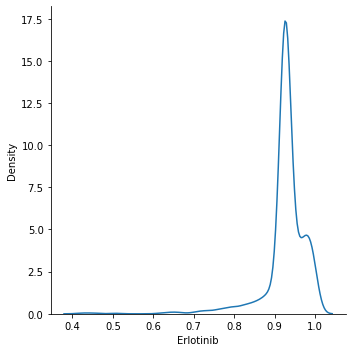

In [12]:
sns.displot(y, kind="kde")

In [ ]:
# So we can see that the target values have skewed distribution with a long initial tail


In [13]:
X = dataset[features]

In [14]:
X.head()

,exp_ALDH3B1,exp_TBXA2R,exp_ELAC2,exp_PIGQ,exp_MYLIP,exp_PSMB1,exp_ABHD5,exp_BRCA1,exp_POLR3B,exp_GRAMD1B,exp_DEF6,exp_AGPAT4,exp_GAB2,exp_YTHDC2,exp_C12orf4,exp_TNIP3,exp_THRAP3,exp_STYK1,exp_ERBB3,exp_CDK13,exp_MGAT4A,exp_FCGR2B,exp_XRCC1,exp_TP63,exp_ALPK1,exp_GLI2,exp_PLD1,exp_GPATCH1,exp_P2RY10,exp_PGM1,exp_SCTR,exp_GSK3B,exp_TNPO1,exp_SLC27A5,exp_KIF3C,exp_RRN3,exp_WNT11,exp_MTIF2,exp_SRRT,exp_TMPRSS11E,...,exp_CD80,exp_CACTIN,exp_MYCNOS,exp_TONSL,exp_TMEM17,exp_LCN2,exp_CARD11,exp_DFFB,exp_C1orf64,exp_NTRK1,exp_C16orf52,exp_DTX3,exp_NRDE2,exp_FPGS,exp_CSNK1G2,exp_PRKD1,exp_IMMP2L,exp_CDK14,exp_CCL25,exp_TPM3,exp_PAPD5,exp_CCNK,exp_SMPDL3B,exp_ZNF479,exp_ABRACL,exp_CCDC157,exp_FBXO5,exp_AC006116.17,exp_EPS8L1,exp_TAAR1,exp_RP1-69D17.3,exp_ZFY,exp_RPS29,exp_SMAD5,exp_ZC3HC1,exp_ZMYM3,exp_CIRBP,exp_MSN,exp_PDPN,exp_KIAA1456
0,5.332068,5.613804,8.583122,5.351879,7.298835,12.727437,7.815232,9.582944,9.377173,5.045035,6.078029,3.897749,7.305856,NaN,8.322389,3.715969,8.112591,8.669577,5.297128,7.693420,4.352324,3.759919,7.427478,3.830598,5.966546,4.151271,4.125426,7.592972,3.759530,8.521257,4.095565,7.580423,9.529565,5.609796,6.080109,10.157352,4.151099,10.099329,8.364451,3.733183,...,NaN,5.683292,3.861059,5.769806,7.635177,4.201648,5.109288,6.479429,3.893705,3.582479,8.051999,4.226136,4.364691,6.338948,7.900701,4.620228,NaN,9.272192,4.365646,NaN,8.561840,6.556807,5.344507,3.354633,12.565178,4.908278,9.861356,4.177199,6.094268,3.954945,3.747778,6.499362,6.435833,8.361070,9.914313,7.199420,7.183395,4.648890,3.843081,3.738231
1,NaN,4.444631,9.008218,5.105823,7.913547,12.517458,7.280895,7.777871,9.271241,6.720515,4.682578,4.977737,6.665028,8.947037,7.731367,3.747263,8.169364,5.542756,5.413200,7.043574,4.708887,NaN,6.838305,3.943316,7.781867,5.062617,5.506630,7.051435,3.471706,9.156991,4.200039,8.959411,9.932116,5.686480,5.128849,9.738769,3.995706,11.042208,7.154064,4.013644,...,3.622198,5.445282,NaN,6.354785,8.028414,6.687008,4.971279,6.614888,4.081260,3.601829,7.604872,3.917713,4.757483,NaN,7.526438,3.694490,6.191045,5.148200,4.634077,7.043642,9.301337,7.040201,4.363401,3.393433,9.122821,4.753364,9.533123,3.895618,NaN,3.909534,3.788824,5.478426,8.067889,8.723680,8.410135,NaN,7.795937,4.855809,3.970728,3.774648
2,5.605698,NaN,8.898105,5.586974,6.134739,12.971607,7.870813,NaN,8.428964,5.659006,5.126722,6.089012,7.912269,7.577540,7.945217,3.707126,NaN,6.919333,4.922276,6.707961,4.203910,3.707880,7.430700,4.366842,6.197245,5.082134,4.826023,7.424831,4.035421,10.665878,NaN,7.193747,9.798624,4.846879,8.763770,8.470668,4.298778,10.245974,8.101396,5.425294,...,3.702735,6.396406,4.023376,5.278451,7.410414,13.024511,7.916932,5.101791,4.140189,NaN,7.880280,NaN,4.785510,7.803542,8.381381,4.511903,6.481863,8.629700,4.646756,5.921809,NaN,7.452154,6.124350,3.183405,11.773527,4.960934,10.013115,3.787315,5.293685,3.655333,3.788395,3.883212,NaN,8.241948,10.084551,NaN,6.690449,NaN,3.979788,3.767280
3,5.600420,5.227187,NaN,5.463622,6.750111,13.167282,8.230154,8.427137,8.866081,5.736139,NaN,4.968936,7.528272,NaN,8.909074,3.722300,8.404938,3.869231,4.267206,7.361224,4.605853,3.847301,7.270288,4.038599,NaN,5.702869,4.538080,7.653117,4.133336,10.680945,4.368771,8.214779,10.169141,5.858755,7.309968,8.661320,4.067059,11.311402,8.543625,3.857765,...,3.655098,6.339325,3.876358,6.022591,NaN,4.159766,4.976989,6.268705,3.984246,NaN,8.344793,4.918179,4.952986,7.301157,NaN,4.696873,5.175555,6.321756,4.230160,5.553331,8.494555,7.252368,5.271586,NaN,9.322858,5.012469,NaN,4.100421,NaN,NaN,3.812628,3.527591,NaN,NaN,9.603301,7.443413,7.464673,5.608629,3.949879,4.039176
4,6.009817,4.757585,9.124004,5.040151,7.136392,12.690483,7.322986,7.910829,8.994872,5.532935,4.998818,NaN,8.145676,7.720591,7.998917,3.612603,8.607117,NaN,NaN,8.015474,5.044989,NaN,7.334230,4.036745,5.676593,4.227998,4.613581,7.245098,3.897732,10.946035,4.068831,9.208498,9.973715,5.159418,8.103184,9.302813,4.283222,10.193000,7.581884,4.037319,...,3.710484,NaN,3.861536,5.246653,7.789558,10.585737,7.336

In [15]:
#Counting the total number of NaNs in each columns
NaN4Features = X.isnull().sum()

In [16]:
print(NaN4Features)

exp_ALDH3B1     106
exp_TBXA2R      106
exp_ELAC2       106
exp_PIGQ        106
exp_MYLIP       106
               ... 
exp_ZMYM3       106
exp_CIRBP       106
exp_MSN         106
exp_PDPN        106
exp_KIAA1456    106
Length: 1324, dtype: int64


In [ ]:
#This means that each of the feature columns have 106 /1061 = 10% as NaN values that should be imputed

In [17]:
#Total sum of NaN values in the dataset
X.isnull().values.sum()

140344

In [18]:
140344 / 1327 #Dividing the total number of NaNs by total number of features

105.76036171816126

In [ ]:
#This is the same number of NaNs per column variable as we calculated earlier

In [ ]:
#

In [19]:
#Now I am imputing the missing values by median although more sophisticated methods such as kNN or Bayesian imputation can also be used
X = X.fillna(X.median())

In [20]:
X.head()

,exp_ALDH3B1,exp_TBXA2R,exp_ELAC2,exp_PIGQ,exp_MYLIP,exp_PSMB1,exp_ABHD5,exp_BRCA1,exp_POLR3B,exp_GRAMD1B,exp_DEF6,exp_AGPAT4,exp_GAB2,exp_YTHDC2,exp_C12orf4,exp_TNIP3,exp_THRAP3,exp_STYK1,exp_ERBB3,exp_CDK13,exp_MGAT4A,exp_FCGR2B,exp_XRCC1,exp_TP63,exp_ALPK1,exp_GLI2,exp_PLD1,exp_GPATCH1,exp_P2RY10,exp_PGM1,exp_SCTR,exp_GSK3B,exp_TNPO1,exp_SLC27A5,exp_KIF3C,exp_RRN3,exp_WNT11,exp_MTIF2,exp_SRRT,exp_TMPRSS11E,...,exp_CD80,exp_CACTIN,exp_MYCNOS,exp_TONSL,exp_TMEM17,exp_LCN2,exp_CARD11,exp_DFFB,exp_C1orf64,exp_NTRK1,exp_C16orf52,exp_DTX3,exp_NRDE2,exp_FPGS,exp_CSNK1G2,exp_PRKD1,exp_IMMP2L,exp_CDK14,exp_CCL25,exp_TPM3,exp_PAPD5,exp_CCNK,exp_SMPDL3B,exp_ZNF479,exp_ABRACL,exp_CCDC157,exp_FBXO5,exp_AC006116.17,exp_EPS8L1,exp_TAAR1,exp_RP1-69D17.3,exp_ZFY,exp_RPS29,exp_SMAD5,exp_ZC3HC1,exp_ZMYM3,exp_CIRBP,exp_MSN,exp_PDPN,exp_KIAA1456
0,5.332068,5.613804,8.583122,5.351879,7.298835,12.727437,7.815232,9.582944,9.377173,5.045035,6.078029,3.897749,7.305856,7.914445,8.322389,3.715969,8.112591,8.669577,5.297128,7.693420,4.352324,3.759919,7.427478,3.830598,5.966546,4.151271,4.125426,7.592972,3.759530,8.521257,4.095565,7.580423,9.529565,5.609796,6.080109,10.157352,4.151099,10.099329,8.364451,3.733183,...,3.736758,5.683292,3.861059,5.769806,7.635177,4.201648,5.109288,6.479429,3.893705,3.582479,8.051999,4.226136,4.364691,6.338948,7.900701,4.620228,6.201563,9.272192,4.365646,5.781480,8.561840,6.556807,5.344507,3.354633,12.565178,4.908278,9.861356,4.177199,6.094268,3.954945,3.747778,6.499362,6.435833,8.361070,9.914313,7.199420,7.183395,4.648890,3.843081,3.738231
1,6.130343,4.444631,9.008218,5.105823,7.913547,12.517458,7.280895,7.777871,9.271241,6.720515,4.682578,4.977737,6.665028,8.947037,7.731367,3.747263,8.169364,5.542756,5.413200,7.043574,4.708887,3.940743,6.838305,3.943316,7.781867,5.062617,5.506630,7.051435,3.471706,9.156991,4.200039,8.959411,9.932116,5.686480,5.128849,9.738769,3.995706,11.042208,7.154064,4.013644,...,3.622198,5.445282,4.044432,6.354785,8.028414,6.687008,4.971279,6.614888,4.081260,3.601829,7.604872,3.917713,4.757483,6.991308,7.526438,3.694490,6.191045,5.148200,4.634077,7.043642,9.301337,7.040201,4.363401,3.393433,9.122821,4.753364,9.533123,3.895618,5.266917,3.909534,3.788824,5.478426,8.067889,8.723680,8.410135,6.805635,7.795937,4.855809,3.970728,3.774648
2,5.605698,4.743115,8.898105,5.586974,6.134739,12.971607,7.870813,8.308473,8.428964,5.659006,5.126722,6.089012,7.912269,7.577540,7.945217,3.707126,8.116783,6.919333,4.922276,6.707961,4.203910,3.707880,7.430700,4.366842,6.197245,5.082134,4.826023,7.424831,4.035421,10.665878,4.178429,7.193747,9.798624,4.846879,8.763770,8.470668,4.298778,10.245974,8.101396,5.425294,...,3.702735,6.396406,4.023376,5.278451,7.410414,13.024511,7.916932,5.101791,4.140189,3.749216,7.880280,4.337517,4.785510,7.803542,8.381381,4.511903,6.481863,8.629700,4.646756,5.921809,8.422056,7.452154,6.124350,3.183405,11.773527,4.960934,10.013115,3.787315,5.293685,3.655333,3.788395,3.883212,6.122512,8.241948,10.084551,6.805635,6.690449,5.344803,3.979788,3.767280
3,5.600420,5.227187,8.896156,5.463622,6.750111,13.167282,8.230154,8.427137,8.866081,5.736139,5.588142,4.968936,7.528272,7.914445,8.909074,3.722300,8.404938,3.869231,4.267206,7.361224,4.605853,3.847301,7.270288,4.038599,6.293683,5.702869,4.538080,7.653117,4.133336,10.680945,4.368771,8.214779,10.169141,5.858755,7.309968,8.661320,4.067059,11.311402,8.543625,3.857765,...,3.655098,6.339325,3.876358,6.022591,7.103285,4.159766,4.976989,6.268705,3.984246,3.749216,8.344793,4.918179,4.952986,7.301157,7.875885,4.696873,5.175555,6.321756,4.230160,5.553331,8.494555,7.252368,5.271586,3.466483,9.322858,5.012469,9.723550,4.100421,5.266917,3.884854,3.812628,3.527591,6.122512,8.784042,9.603301,7.443413,7.464673,5.608629,3.949879,4.039176
4,6.009817,4.757585,9.124004,5.040151,7.136392,12.690483,7.322986,7.910829,8.994872,5.532935,4.998818,5.369706,8.145676,7.720591,7.998917,3.612603,8.607117,5.156679,4.692195,8.015474,5.044989,3.940743,7.334230,4.036745,5.676593,4.227998,4.

In [21]:
#Now checking for NaN in target variable
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1056    False
1057    False
1058    False
1059    False
1060    False
Name: Erlotinib, Length: 1061, dtype: bool

In [22]:
#So there is no NaN value in target

In [ ]:
#Now I split the predictors and target into train and test

In [22]:
Xtrain, Xtest , yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=3)

In [23]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)

Now doing Dimensionality reduction

In [24]:
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)

In [ ]:
#Now lets look how much variance is covered by the first two components

In [25]:
pcaObj.explained_variance_ratio_

array([0.10280983, 0.0739911 ])

In [ ]:
#Clearly, using this method has lead to a very poor dimensionality reduction, given that the first two 
#components cover 10 + 7 = 17% variance only.

In [ ]:
#So now I use dimensionality reduction in order to preserve at least 95% of variance

In [26]:
pcaObj = PCA(n_components = 0.95)
pcaObj.fit(xTrain)
xTrainPCA95 = pcaObj.transform(xTrain)

In [27]:
pcaObj.explained_variance_ratio_

array([0.10280983, 0.0739911 , 0.050475  , 0.02218939, 0.02073813,
       0.0186017 , 0.01669892, 0.01605318, 0.01444368, 0.01396294,
       0.0126708 , 0.01190923, 0.01138149, 0.01086782, 0.00999253,
       0.00914863, 0.00860138, 0.0081839 , 0.00789484, 0.00754902,
       0.00715336, 0.0069826 , 0.00662501, 0.00650323, 0.00643303,
       0.00618991, 0.00601058, 0.00576507, 0.00565041, 0.0054821 ,
       0.00540612, 0.00527356, 0.00506426, 0.00499908, 0.00487384,
       0.00480442, 0.00471304, 0.00459201, 0.00444738, 0.00434259,
       0.00423314, 0.00420617, 0.00404864, 0.00398554, 0.00397242,
       0.00391078, 0.00385059, 0.00376773, 0.00367665, 0.00363308,
       0.00354507, 0.0035082 , 0.00346519, 0.00336569, 0.00335331,
       0.00330027, 0.00324679, 0.00323287, 0.0031937 , 0.00312601,
       0.00309841, 0.00305698, 0.0030174 , 0.00297146, 0.00292514,
       0.00286537, 0.00283939, 0.00279986, 0.00277859, 0.00272177,
       0.00270106, 0.00267247, 0.00262517, 0.00260828, 0.00257

In [29]:
#This also does not seem to be working given that in order to get 95% variance, there is hardly any reduction
#in dimension as we still have a lot of dimensions.

#Lets look at our data again

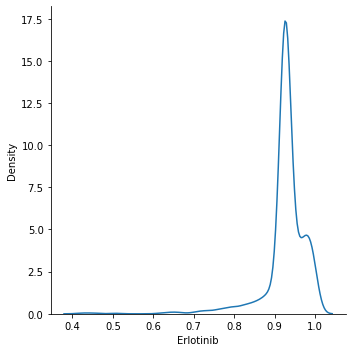

In [28]:
sns.displot(y, kind="kde")

In [ ]:
# Clearly, there is no point in having those data points where the value of Erlotinib y value is less
#than 0.7 . This is because we do not have adequate data points for those y values and it would be better if
# we discard those data values. This will also ensure that we have a more normal distribution. 


In [29]:
datasetGaussian = dataset[(dataset.Erlotinib>0.7)]

In [30]:
datasetGaussian.shape

(1050, 1325)

In [31]:
yGaussian = datasetGaussian.Erlotinib

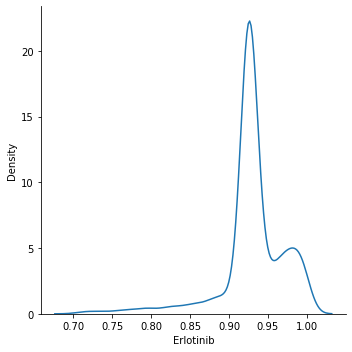

In [32]:
sns.displot(yGaussian, kind="kde")

In [ ]:
#Great, so we get rid of a lot of sparse data. 
#Now lets continue the procedure as earlier

In [33]:
yGaussian.describe()

count    1050.000000
mean        0.929579
std         0.042860
min         0.708249
25%         0.925969
50%         0.925969
75%         0.947845
max         1.000000
Name: Erlotinib, dtype: float64

In [34]:
features = list(datasetGaussian.columns.values) #Make a list of all of the columns in the df. Here note we are using datasetGaussian
features.pop(features.index('Erlotinib'))
X = datasetGaussian[features]
NaN4Features = X.isnull().sum()
X.isnull().values.sum()

138881

In [35]:
X = X.fillna(X.median()) #Imputing by median

In [36]:
Xtrain, Xtest , yTrain, yTest = train_test_split(X, yGaussian, test_size=0.3, random_state=3)

In [37]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)

In [38]:
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.10062728, 0.07330012])

In [ ]:
#We see that there is only a slight improvement in percentage variance captured i.e., its 18% now.

In [ ]:
#Lets see if I can further improve it, by normalizing yGaussian


In [39]:
meanY = np.mean(yGaussian)
stdY = np.std(yGaussian)

In [40]:
meanY

0.9295787892968261

In [41]:
stdY

0.04283920498797159

In [42]:
yNorm = (yGaussian-meanY)/stdY


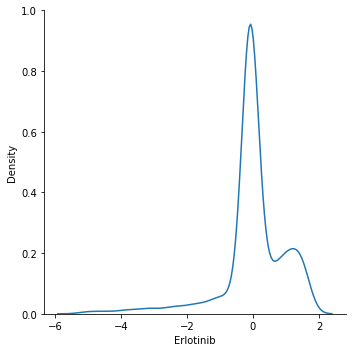

In [43]:
sns.displot(yNorm, kind="kde")

In [47]:
#Lets Normalize X

In [44]:
meanX = np.mean(X)
stdX = np.std(X)

In [45]:
meanX.head()

exp_ALDH3B1    6.171930
exp_TBXA2R     4.897506
exp_ELAC2      8.899919
exp_PIGQ       5.311252
exp_MYLIP      7.541439
dtype: float64

In [46]:
XNorm = (X-meanX)/stdX

In [47]:
XNorm = XNorm.fillna(X.median()) #Imputing by median

In [48]:
Xtrain, Xtest , yTrain, yTest = train_test_split(XNorm, yNorm, test_size=0.3, random_state=3)

In [49]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.065962  , 0.03868819])

In [ ]:
#This did not work either, as the cumulative variance percentage in fact got less.

In [51]:
#Lets try it with yGaussian, which has original y values. This will ensure that the model will predict the right
#values and not the normalized values
Xtrain, Xtest , yTrain, yTest = train_test_split(XNorm, yGaussian, test_size=0.3, random_state=3)

In [52]:
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.065962  , 0.03868819])

#Remarks: Despite using several strategies for dimensionality reduction, it does not seem to be working well, given that the combined variance of initial components looks to be very less despite all the strategies. 

For calculations ahead, I shall use the xTrain, xTest, yTrain and yTest as derived using yGaussian, as it will help me build a model that will give the true value of y (Erlotinib)

In [ ]:
#Lets try Polynomial Regression and then we will use ElasticNet

In [65]:
poly_features = PolynomialFeatures(degree=2, include_bias= False)

In [66]:
X_poly = poly_features.fit_transform(xTrain)

In [67]:
xTrain[0].shape

(1324,)

In [68]:
xTrain.shape

(735, 1324)

In [69]:
X_poly[0].shape

(878474,)

In [70]:
X_poly.shape

(735, 878474)

In [ ]:
#So we see that X_poly now has far more columns than xTrain which is a result of combination of all 2nd degree
# variables. Total attributes is equal to ( 1320 + 2 )! / (1320! 2!)

In [ ]:
#Now fitting a 

In [53]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly,yTrain)

This gave the error :Your session crashed after using all available RAM
Thus, I am abandoning polynomial fitting

In [ ]:
#If we had managed to do dimensionality reduction, then it would have made sense to carry out Polynomial fit.

In [73]:
#Lets start simple linear regression fit.
lin_reg = LinearRegression()

In [63]:
#Lets first design a cross-validation set up as desired.
#For that I make use of GridSearch
#GridSearchCV should be used to find the optimal parameters to train your final model. 
#Typically, you should run GridSearchCV then look at the parameters that gave the model with the best score. 
#You should then take these parameters and train your final model on all of the data. It is important to 
#note that if you have trained your final model on all of your data, you cannot test it. For any correct test, 
#you must must reserve some of the data. That is why I am reserving the test data for the purpose.

In [71]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]} #Note that although I have done normalization, I am repeating it make a second normalization

In [72]:
grid_search = GridSearchCV(lin_reg, parameters, cv=5, scoring='r2', verbose=1, return_train_score=True)#Five fold cross validation




In [74]:
grid_search.fit(Xtrain, yTrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   10.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [75]:

print("Residual sum of squares: %.11f" % np.mean((grid_search.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00512376273


In [76]:
print('Best Score: ', grid_search.best_score_) #Gets the best R2 value score
print('Best Params: ', grid_search.best_params_) #Gets the parameter corresponding to it

Best Score:  -1.1665692389888391
Best Params:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [ ]:
#We see that the residual sum of square comes out to be close to zero in grid search

In [77]:
#Now doing Linear Regression WITHOUT Grid Search cross validation
model = LinearRegression()
model.fit(Xtrain, yTrain)
#predictions = model.predict(XTest)
print("r2/variance : ", model.score(Xtest,yTest))
print("Residual sum of squares: %.11f" % np.mean((model.predict(Xtest) - yTest) ** 2))

r2/variance :  -1.7816813799648819
Residual sum of squares: 0.00512376273


In [ ]:
#Here the R2 score became  more negative, and so the model is not as good as what we found by GridSearch

We see that R2 score is lowest for grid_search selected model. 


In [ ]:
#The simple linear regression can also help us get the coefficients of each of the feature variables which we can plot

In [78]:
featureCoefficients = pd.DataFrame() 
featureCoefficients["Features"] = pd.DataFrame(Xtrain).columns
featureCoefficients['PredictedValues'] = pd.Series(model.coef_) 

print(featureCoefficients) 

          Features  PredictedValues
0      exp_ALDH3B1        -0.003137
1       exp_TBXA2R         0.001259
2        exp_ELAC2        -0.001440
3         exp_PIGQ        -0.003125
4        exp_MYLIP         0.001334
...            ...              ...
1319     exp_ZMYM3         0.003328
1320     exp_CIRBP        -0.000388
1321       exp_MSN         0.001883
1322      exp_PDPN        -0.001647
1323  exp_KIAA1456        -0.002676

[1324 rows x 2 columns]


In [79]:
# find optimal alpha with grid search and Lasso Regression for regularization
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
lasso = Lasso()
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = grid.fit(Xtrain, yTrain)
print('Best Score: ', grid_result.best_score_) #Get best R2 score
print('Best Params: ', grid_result.best_params_) #Get the alpha parameter which corresponds to best results



Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  -1.3784472410560688e-05
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.7s finished


In [80]:
print("Residual sum of squares: %.11f" % np.mean((grid_result.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00184469183


We see that the residual sum of squares has dropped significantly compared to previous models. However, there is no significant improvement in R2 score compared to the model we obtained using GridSearch with simple linear regression model. The n_jobs=-1 takes in all available cores.


In [81]:
#Now making models for ElasticNet
elastic_net = ElasticNet()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = grid.fit(Xtrain, yTrain)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   35.9s finished


Best Score:  0.06225518787914193
Best Params:  {'alpha': 10, 'l1_ratio': 0}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5671693089353329, tolerance: 0.00013461370150833195
  positive)


In [82]:
print("Residual sum of squares: %.11f" % np.mean((grid_result.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00164736720


There is not much improvement in residual sum of squared than lasso. So essentially either lasso model or elasticnet model can be used which has the lowest residual sum of squares.

In [ ]:
#In order to get the coefficients of each of the predictors, we will now have 
#to build a model with the parameters as we obtained best by GridSearch

In [83]:
eNet = ElasticNet(alpha=10, l1_ratio= 0) 


In [84]:
eNet.fit(Xtrain, yTrain) 
  


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5671693089353329, tolerance: 0.00013461370150833195
  positive)


ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000,
           normalize=False, positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
# calculate the prediction and mean square error 
yPred = eNet.predict(Xtest) 
print("Mean Squared Error:", np.mean((yPred - yTest)**2)) 
 

Mean Squared Error: 0.001647367200155317


In [86]:
#Now lets get the coefficients
eNetCoeff = pd.DataFrame() 
eNetCoeff["Features"] = Xtrain.columns 
eNetCoeff['PredictedCoefficients'] = pd.Series(eNet.coef_) 

In [87]:
eNetCoeff

,Features,PredictedCoefficients
0,exp_ALDH3B1,-0.000102
1,exp_TBXA2R,0.000108
2,exp_ELAC2,0.000085
3,exp_PIGQ,-0.000079
4,exp_MYLIP,0.000150
...,...,...
1319,exp_ZMYM3,0.000119
1320,exp_CIRBP,0.000058
1321,exp_MSN,0.000068
1322,exp_PDPN,-0.000038


**Now we use Random Forest in GRID Search for regression**

In [93]:
param_grid = [
 {'n_estimators': [3, 10, 30,50,60,80,90], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [89]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [94]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',
return_train_score=True)

In [95]:
grid_search.fit(Xtrain, yTrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [96]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 80}

In [97]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
 cvres = grid_search.cv_results_

In [99]:
 for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
   print(np.sqrt(-mean_score), params)

0.050966577095904304 {'max_features': 2, 'n_estimators': 3}
0.04351551886960961 {'max_features': 2, 'n_estimators': 10}
0.04254714347142074 {'max_features': 2, 'n_estimators': 30}
0.04255218738046473 {'max_features': 2, 'n_estimators': 50}
0.04202819995737934 {'max_features': 2, 'n_estimators': 60}
0.041937667192032874 {'max_features': 2, 'n_estimators': 80}
0.04213257743015208 {'max_features': 2, 'n_estimators': 90}
0.05024451922030543 {'max_features': 4, 'n_estimators': 3}
0.04366490578863446 {'max_features': 4, 'n_estimators': 10}
0.04197232546410276 {'max_features': 4, 'n_estimators': 30}
0.041570310245242444 {'max_features': 4, 'n_estimators': 50}
0.042225950042070644 {'max_features': 4, 'n_estimators': 60}
0.04155975504729487 {'max_features': 4, 'n_estimators': 80}
0.04208820688648137 {'max_features': 4, 'n_estimators': 90}
0.048760772041919656 {'max_features': 6, 'n_estimators': 3}
0.04465735263656503 {'max_features': 6, 'n_estimators': 10}
0.04257754692251051 {'max_features': 6

In [101]:
#We note that the RMSE for Training data is lowest of value 0.04138670802260161 for {'max_features': 6, 'n_estimators': 80}

In [102]:
# calculate the prediction and mean square error for Test data 
yPred = grid_search.predict(Xtest) 
print("Mean Squared Error:", np.mean((yPred - yTest)**2))

Mean Squared Error: 0.0017264375831151934


In [107]:
#We note that the mean squared error is also as low as I was getting with Lasso or Ridge Regression earlier or Elastic net

In [108]:
pip install dtreeviz

     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 204.2MB 76kB/s 
     |████████████████████████████████| 204kB 44.4MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=4e434e7d2e23c04aa706bef1ee6a9f7d015e7f3c9663e58d04e814cb9546d14a
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=69c7fb521c33f59bc160ab2256001563a9ed53ccaa7caee35bb72daa58ca7f20
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [109]:
from sklearn import tree
from dtreeviz.trees import dtreeviz

In [110]:
#Now making the tree with the best parameters obtained by random forest
forest_reg = RandomForestRegressor(max_features = 6, n_estimators = 80)

In [111]:
forest_reg.fit(Xtrain, yTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [112]:
def plotRandomForestR(model, X, Y):
    selected_genes = Xtrain.columns # get the feature names
    model.fit(X, Y)
    plt.figure(figsize=(20,20))
    _ = tree.plot_tree(model.estimators_[0], feature_names=selected_genes, filled=True)

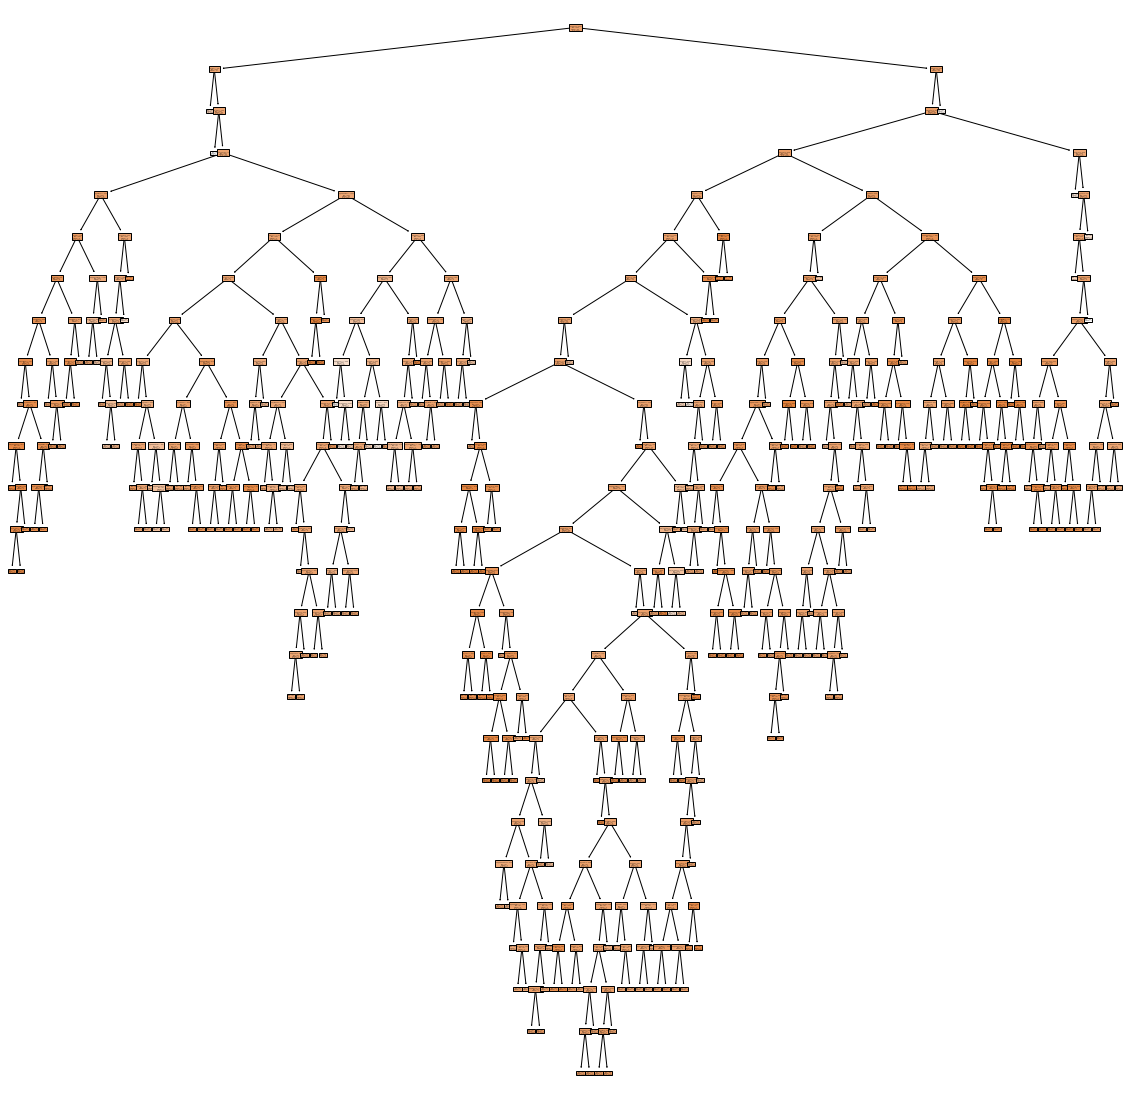

In [113]:
plotRandomForestR(forest_reg,Xtrain,yTrain)